# Cohort analysis (customer retention) 
by Lana Samoilova  

## Introduction 
A **cohort** is a group of people who share a common characteristic over a certain period of time (sign-up date, first purchase month, birth date, acquisition channel, etc.).  

**Cohort analysis** is the method by which these groups are tracked over time, helping you spot trends, understand repeat behaviors (purchases, engagement, amount spent, etc.), and monitor your customer and revenue retention.

For the most business needs, a cohort usually is a group of customers who had their first purchase in a given time interval (typically months). Cohorts help to understand how this particular group develops over time.    

## Target audience
Cohort analysis allows you to answer a lot of business questions - 
- customer's analysis and comparing (key characteristics, behavior, loyality,  ets.)
- products analysis 
- marketing campaigns analysis and comparing
- site user's behavior analysis
- employees analysis (may be usefull for big companies) 
- etc

This analysis is helpful for any business.

## Data
- **Name**: Online Retail Data Set  
- **Data source**: [UCI](https://archive.ics.uci.edu/ml/datasets/online+retail#)  
- **Data Set Information**: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.    
- **Shape**:
    - Data Set has 541909 rows 
    - Data Set has 8 columns:
        - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
        - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
        - Description: Product (item) name. Nominal.
        - Quantity: The quantities of each product (item) per transaction. Numeric.
        - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
        - UnitPrice: Unit price. Numeric, Product price per unit in sterling.
        - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
        - Country: Country name. Nominal, the name of the country where each customer resides. 

## Methodology 
1. Preparing data for an analysis.
2. Cohort analysis.
3. Visualization of results.
4. Conclusion

## Tools
### 1. Libraries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import folium
from geopy.geocoders import Nominatim

from IPython.display import Image as IPythonImage
from PIL import Image, ImageFont, ImageDraw

import sklearn
import scipy as sp

import platform
print('Versions:')
print('  python', platform.python_version())
n = ('numpy', 'pandas', 'matplotlib', 'seaborn', 'folium', 'sklearn', 'scipy')
nn = (np, pd,  mpl, sns, folium, sklearn, sp)
for a, b in zip(n, nn):
    print('  --', str(a), b.__version__)

Versions:
  python 3.6.9
  -- numpy 1.17.3
  -- pandas 0.25.2
  -- matplotlib 3.1.1
  -- seaborn 0.9.0
  -- folium 0.10.0
  -- sklearn 0.21.3
  -- scipy 1.3.1


### 2. Functions:

In [2]:
# customizing print()
from IPython.display import display, Markdown
def printst(string):
    display(Markdown('<strong>{}</strong>'.format(string))) 
def printbd(string):
    display(Markdown('<bold>{}</bold>'.format(string)))

In [3]:
def DataDictionary(df, desdf):
    """ Create a Data Dictionary.     
        Parameters:
            arg_1: data frame (raw data set)
            arg_2: data describtion frame (index: Feature, columns: Descript, Type, Unit)
        Returns:
            Data Dictionary Frame with following columns:
                'Description' - feature meaning
                '#Unique' - number of unique values in the columns where NaN calculated as value also  
                '%Missing' - % of missing values
                'TopValue' - the most used value  
                '%UsedTop' - % of using top value  
                'Dtype' - column's python data type 
                'Type' - column's data type 
                'Unit' - given unit of value 
    """
    cols = df.columns.tolist()
    l = len(df)
    x, y, z, v, w, xx, yy, zz, ww, mi, ma = [], [], [], [], [], [], [], [], [], [], []
    for col in cols:
        s = df[col]
        ll = len(s.unique())
        x.append(ll)
        
        values = s.value_counts().to_frame().reset_index() #number of using for all values
        
        y.append(values.iloc[0,0]) # a name of top value
        nused = values.iloc[0,1] # a number of using 
        yy.append(nused*100/l)
        
        missed = s.isnull().sum() # number of missing values
        z.append(round(missed*100/l, 2))
        
        sdt = str(s.dtype)
        v.append(sdt) # extract a data type       
        
        mi.append(s.min()) if sdt != 'object' else mi.append('')
        ma.append(s.max()) if sdt != 'object' else ma.append('')

        # extract values from data describtion frame
        w.append(desdf['Descript'][col])
        zz.append(desdf['Type'][col])
        ww.append(desdf['Unit'][col])
    
    ddict = pd.DataFrame({'#Unique':x,'%Missing':z, 'MinValue':mi, 'MaxValue':ma, 'TopValue':y, '%UsedTop':yy, 
                          'Dtype':v, 'Type':zz, 'Unit':ww, 'Description':w}, index=[cols]).sort_index()
    
    return ddict

In [4]:
def month_diff(a, b):
    """
    Calculate timedelta in month.
    Arg:
    a = end date
    b = start date
    """
    return 12 * (a.dt.year - b.dt.year) + (a.dt.month - b.dt.month)

In [5]:
def na(df):
    """Print missing values's information for a given data frame"""
    t = df.isnull().sum()
    tdf = t[t > 0].to_frame('#missing')
    print(tdf)

### 3. Customizing an output view:

In [6]:
#pandas styling
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100, 'display.max_rows', 100, 'colheader_justify', 'left', 'precision', 4, 'display.max_colwidth', -1)
#pd.reset_option('all')

%matplotlib inline
sns.set_style('whitegrid', { 'axes.axisbelow': True, 'axes.edgecolor': 'black', 'axes.facecolor': 'white',
        'axes.grid': True, 'axes.labelcolor': 'black', 'axes.spines.bottom': True, 'axes.spines.left': True,
        'axes.spines.right': False, 'axes.spines.top': False, 'figure.facecolor': 'white', 
        'grid.color': 'grey', 'grid.linestyle': ':', 'image.cmap': 'rocket', 'lines.solid_capstyle': 'round',
        'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'text.color': 'black', 
        'xtick.top': False, 'xtick.bottom': True, 'xtick.color': 'navy', 'xtick.direction': 'out', 
        'ytick.right': False,    'ytick.left': True, 'ytick.color': 'navy', 'ytick.direction': 'out'})

# Preparing data for an analysis.

## Understanding the data, managing missing values, feature engineering.

In [7]:
df_raw = pd.read_excel('/home/lana/Desktop/DS_workbook/data/UCI_OnlineRetail.xlsx')#, nrows=100000)
df_raw.shape

(541909, 8)

In [8]:
df_raw.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
521962,580367,23564,EGG CUP MILKMAID INGRID,1,2011-12-02 16:39:00,2.46,nan,United Kingdom
94003,544323,22385,JUMBO BAG SPACEBOY DESIGN,4,2011-02-17 15:51:00,4.13,nan,United Kingdom
301551,563345,21210,SET OF 72 RETROSPOT PAPER DOILIES,12,2011-08-15 13:22:00,1.45,"12,619.00",Germany
159064,550322,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,1,2011-04-17 12:53:00,2.55,"14,524.00",United Kingdom
11622,537255,85116,BLACK CANDELABRA T-LIGHT HOLDER,6,2010-12-06 11:03:00,2.10,"14,443.00",United Kingdom
242208,558319,22629,SPACEBOY LUNCH BOX,1,2011-06-28 11:53:00,2.46,nan,United Kingdom
27214,538524,84970S,HANGING HEART ZINC T-LIGHT HOLDER,4,2010-12-13 09:35:00,2.13,nan,United Kingdom
348218,567382,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-09-20 10:18:00,1.25,"16,215.00",United Kingdom
208369,555110,22467,GUMBALL COAT RACK,1,2011-05-31 14:34:00,2.55,"17,841.00",United Kingdom
259933,559783,20675,BLUE POLKADOT BOWL,8,2011-07-12 12:02:00,1.25,"13,069.00",United Kingdom


In [9]:
df = df_raw[['CustomerID', 'Country', 'InvoiceNo','InvoiceDate', 'StockCode', 'Quantity', 'UnitPrice',  'Description']].copy()

# get year and moth only from Invoice date
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m')

First of all, we need to create a Data Dictionary

In [10]:
# open data description file
desdf = pd.read_excel('/home/lana/Desktop/DS_workbook/outbox/UCI_OnlineRetail_DDescribtion.xlsx')
desdf = desdf.set_index('Feature')

# checking the shapes
set1 = set(df_raw.columns.tolist())
set2 = set(desdf.index.tolist())
set1.difference(set2)

set()

In [11]:
# creating a Data Dictionary
ddict = DataDictionary(df, desdf)
ddict

,#Unique,%Missing,MinValue,MaxValue,TopValue,%UsedTop,Dtype,Type,Unit,Description
Country,38,0.00,,,United Kingdom,91.43,object,nominal,-,The name of the country where each customer resides
CustomerID,4373,24.93,"12,346.00","18,287.00","17,841.00",1.47,float64,nominal,-,A 5-digit integral number uniquely assigned to each customer
Description,4224,0.27,,,WHITE HANGING HEART T-LIGHT HOLDER,0.44,object,nominal,-,Product (item) name
InvoiceDate,13,0.00,,,2011-11,15.63,object,time,-,The day and time when each transaction was generated
InvoiceNo,25900,0.00,,,573585,0.21,object,nominal,-,"Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ""c"", it indicates a cancellation"
Quantity,722,0.00,-80995,80995,1,27.35,int64,numeric,pcs,The quantities of each product (item) per transaction.
StockCode,4070,0.00,,,85123A,0.43,object,nominal,-,"Product (item) code, a 5-digit integral number uniquely assigned to each distinct product"
UnitPrice,1630,0.00,"-11,062.06","38,970.00",1.25,9.32,float64,cont,sterling,Product price per unit


So, we have 541.909 records for one year purchases with 4372 customers to analysis (but near 25% customers are unknown). From 37 countries, UK orders are almost 90%.

Data cleaning should start with:
- manage missing values,
- understand negative prices,
- understand negative orders,
- check for outliers
- create 'Total' column

### missing values:

In [12]:
na(df)

             #missing
CustomerID   135080  
Description  1454    


At this case, when we can't get more information, let's fill missing values by 'unknown' for 'Description' and 0 for the 'CustomerID'

In [13]:
df['CustomerID'] = df['CustomerID'].fillna(0)
df['Description'] = df['Description'].fillna('unknown')
df['CustomerID'] = df['CustomerID'].astype('int')
df.shape

(541909, 8)

### negative prices:

In [14]:
df['UnitPrice'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,"541,909.00",4.61,96.76,"-11,062.06",1.25,2.08,4.13,"38,970.00"


In [15]:
badprice = df[df['UnitPrice']<0]
badprice

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
299983,0,United Kingdom,A563186,2011-08,B,1,"-11,062.06",Adjust bad debt
299984,0,United Kingdom,A563187,2011-08,B,1,"-11,062.06",Adjust bad debt


In [16]:
b = df[df['StockCode']=='B']
b

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
299982,0,United Kingdom,A563185,2011-08,B,1,"11,062.06",Adjust bad debt
299983,0,United Kingdom,A563186,2011-08,B,1,"-11,062.06",Adjust bad debt
299984,0,United Kingdom,A563187,2011-08,B,1,"-11,062.06",Adjust bad debt


In [17]:
baddebt = ['A563185', 'A563186', 'A563187']
df[df['InvoiceNo'].isin(baddebt)]

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
299982,0,United Kingdom,A563185,2011-08,B,1,"11,062.06",Adjust bad debt
299983,0,United Kingdom,A563186,2011-08,B,1,"-11,062.06",Adjust bad debt
299984,0,United Kingdom,A563187,2011-08,B,1,"-11,062.06",Adjust bad debt


Debt correction. We can'tfind origin order here, so I'll delete this rows just.

In [18]:
df= df.drop(b.index, axis=0)

What about strage zero price?

In [19]:
zeroprice = df[df['UnitPrice']==0]
zeroprice.shape

(2515, 8)

In [20]:
zeroprice.sample(20)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
75256,0,United Kingdom,542573,2011-01,85110,-1,0.00,unknown
313661,0,United Kingdom,564530,2011-08,22363,1,0.00,GLASS JAR MARMALADE
185169,0,United Kingdom,552768,2011-05,22087,-26,0.00,unknown
374539,0,United Kingdom,569379,2011-10,16015,-69,0.00,unknown
468999,0,United Kingdom,576566,2011-11,21830,-186,0.00,unknown
495929,0,United Kingdom,578340,2011-11,22568,8,0.00,unknown
432117,0,United Kingdom,573815,2011-11,20902,-3,0.00,check
360738,0,United Kingdom,568302,2011-09,20700,-121,0.00,?
41464,0,United Kingdom,539856,2010-12,22682,3,0.00,FRENCH BLUE METAL DOOR SIGN 7
82798,0,United Kingdom,543261,2011-02,84613C,-173,0.00,unknown


Negative quantity, unknown goods, unknown customers, even "mystery" row (index number 151033). When you can't discuss it with a stakeholder, it should be excluded from analysis, I believe.

In [21]:
df = df.drop(zeroprice.index, axis=0)

### negative number of orders:

In [22]:
df['Quantity'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Quantity,"539,391.00",9.85,215.41,"-80,995.00",1.00,3.00,10.00,"80,995.00"


We have it still. Some invoices contain letter 'C' in the beginning, I suppose there are cancelled orders. 
Do negative 'Quantity' rows mean cancelled invoice?

In [23]:
cancelled = df[df['InvoiceNo'].str.contains('C', na=False)]
len(df[df['Quantity']<0]) == len(cancelled)

True

How many orders were canceled?

In [24]:
cancelled.shape[0]

9288

So, it's not a mistake - negative numbers are mean cancelled order.   
Let's try to find an original order for every cancelled. I'll extract numbers only from the 'InvoiceNo' and test it for uniqueness:

In [25]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df['Cancelled'] = (df['InvoiceNo'].str.contains('C', na=False)).map({True:1, False:0}).astype(int)
df['Numbers'] = df['InvoiceNo'].str.extract('(\d+)') # extract numbers only from the sting

df.sample(3)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description,Cancelled,Numbers
174017,18178,United Kingdom,551734,2011-05,20685,2,7.95,DOORMAT RED RETROSPOT,0,551734
147469,14911,EIRE,549118,2011-04,21523,2,7.95,DOORMAT FANCY FONT HOME SWEET HOME,0,549118
432372,14485,United Kingdom,573870,2011-11,22811,1,2.95,SET OF 6 T-LIGHTS CACTI,0,573870


In [26]:
df['InvoiceNo'].value_counts().to_frame().T

,573585,581219,581492,580729,558475,579777,581217,537434,580730,538071,580367,580115,581439,580983,578344,538349,578347,537638,537237,536876,576617,536592,537823,576837,579508,577078,537240,577358,576618,576840,576339,579187,537666,538177,579196,580727,578844,536544,575930,577768,578827,576329,575176,539437,575477,539958,579512,575875,540551,578065,...,C554025,C537143,545414,C573024,C544560,C546623,C538704,577138,C551190,C570962,C552700,C540366,538063,C561810,C568385,539460,550940,543520,C549533,C541833,C555337,563545,C572276,C553562,C564504,C563612,C575047,C570483,561657,C563535,C546931,C555874,545790,550198,575433,C542643,549961,575205,558721,C538314,C571466,C549931,C549230,568195,C570480,564720,C555248,567642,538719,C581071
InvoiceNo,1114,749,731,721,705,687,676,675,662,651,650,645,635,629,622,620,606,601,597,593,593,592,591,585,578,572,568,561,552,544,542,541,536,534,533,529,527,527,526,526,520,518,518,518,515,512,503,503,502,494,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


'InvoiceNo' has not unique values!

In [27]:
orders = df[df['Cancelled']==0].groupby(['InvoiceDate'])['InvoiceNo'].count()
orders = orders.to_frame('orders_all')
# orders

In [28]:
cancelled = df[df['Cancelled']==1].groupby(['InvoiceDate'])['InvoiceNo'].count()
cancelled = cancelled.to_frame('orders_cancelled')
# cancelled

In [29]:
tdf = orders.join(cancelled, how='outer')
tdf['perc'] = tdf['orders_cancelled']*100/tdf['orders_all']
tdf

,orders_all,orders_cancelled,perc
InvoiceDate,,,
2010-12,41480,728,1.76
2011-01,34306,701,2.04
2011-02,27105,475,1.75
2011-03,35803,699,1.95
2011-04,29096,559,1.92
2011-05,36164,621,1.72
2011-06,35977,711,1.98
2011-07,38645,685,1.77
2011-08,34482,668,1.94


In [30]:
a = tdf['orders_cancelled'].sum()
a, round(a*100/len(df),2)

(9288, 1.72)

We have 9288 cancelled order, what is 1.72 % of all. But not all of them have the same number part as original:

In [31]:
df[df['InvoiceNo'].isin(['C564506', '564506'])]

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description,Cancelled,Numbers
313480,15315,United Kingdom,C564506,2011-08,84818,-24,0.79,DANISH ROSE PHOTO FRAME,1,564506


To avoid doubling the error, I'll delete cancelled orders from analysis all at once despite it may be a very interesting to know what exact were returned (need to consult with data owner what it impossible here)

In [32]:
rowstodelete = df[df['Cancelled']==1].index
df = df.drop(rowstodelete, axis=0)
df = df.drop(['Cancelled', 'Numbers'], axis=1).reset_index(drop=True)
df.shape

(530103, 8)

### Outliers
Let's check all numerical at once

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,"530,103.00","11,479.67","6,781.96",0.00,"12,352.00","14,388.00","16,265.00","18,287.00"
Quantity,"530,103.00",10.54,155.52,1.00,1.00,3.00,10.00,"80,995.00"
UnitPrice,"530,103.00",3.89,32.55,0.00,1.25,2.08,4.13,"13,541.33"


Zero price? It can't be so!

In [34]:
df['UnitPrice'].sort_values().tolist()[:10]

[0.001, 0.001, 0.001, 0.001, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]

Strage price again. 

In [35]:
strange = df[df['UnitPrice']==0.001]
strange

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
153304,13952,United Kingdom,550193,2011-04,PADS,1,0.00,PADS TO MATCH ALL CUSHIONS
272367,15618,United Kingdom,561226,2011-07,PADS,1,0.00,PADS TO MATCH ALL CUSHIONS
351479,16198,United Kingdom,568200,2011-09,PADS,1,0.00,PADS TO MATCH ALL CUSHIONS
353322,13405,United Kingdom,568375,2011-09,BANK CHARGES,1,0.00,Bank Charges


In [36]:
df = df.drop(strange.index, axis=0)

What about unusual big prices?

In [37]:
outliers = df[df['UnitPrice']>100]
outliers.sample(10)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
126666,0,United Kingdom,547386,2011-03,DOT,1,131.22,DOTCOM POSTAGE
68029,0,United Kingdom,541971,2011-01,DOT,1,124.16,DOTCOM POSTAGE
192363,0,United Kingdom,553890,2011-05,DOT,1,167.03,DOTCOM POSTAGE
18197,0,United Kingdom,537823,2010-12,DOT,1,729.42,DOTCOM POSTAGE
378002,0,United Kingdom,570258,2011-10,DOT,1,930.04,DOTCOM POSTAGE
102850,0,United Kingdom,545217,2011-02,DOT,1,172.62,DOTCOM POSTAGE
242224,0,United Kingdom,558809,2011-07,DOT,1,146.50,DOTCOM POSTAGE
467338,0,United Kingdom,577078,2011-11,DOT,1,695.08,DOTCOM POSTAGE
357697,0,United Kingdom,568719,2011-09,DOT,1,236.91,DOTCOM POSTAGE
390830,0,United Kingdom,571305,2011-10,DOT,1,657.29,DOTCOM POSTAGE


In [38]:
outliers['Description'].unique()

array(['RUSTIC  SEVENTEEN DRAWER SIDEBOARD', 'DOTCOM POSTAGE',
       'VINTAGE RED KITCHEN CABINET', 'Manual', 'AMAZON FEE',
       'REGENCY MIRROR WITH SHUTTERS', 'LOVE SEAT ANTIQUE WHITE METAL',
       'VINTAGE BLUE KITCHEN CABINET', 'CHEST NATURAL WOOD 20 DRAWERS',
       'CARRIAGE', 'POSTAGE', 'PICNIC BASKET WICKER 60 PIECES'],
      dtype=object)

We're seening here the real products and some strange records, let's take a look to strange one.


In [39]:
tdf = df[df['Description'].isin(['DOTCOM POSTAGE', 'Manual', 'AMAZON FEE', 'CARRIAGE', 'POSTAGE'])]
tdf.shape

(2297, 8)

In [40]:
tdf.sample(10)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
38487,12481,Germany,539636,2010-12,POST,6,18.00,POSTAGE
1801,0,United Kingdom,536544,2010-12,DOT,1,569.77,DOTCOM POSTAGE
503665,14911,EIRE,579768,2011-11,C2,1,50.00,CARRIAGE
113312,14156,EIRE,546172,2011-03,C2,1,50.00,CARRIAGE
339761,12540,Spain,567340,2011-09,POST,4,28.00,POSTAGE
481186,12452,Switzerland,578099,2011-11,POST,2,1.00,POSTAGE
410548,12456,Switzerland,572896,2011-10,POST,4,40.00,POSTAGE
453997,14911,EIRE,576141,2011-11,C2,1,50.00,CARRIAGE
474846,12583,France,577687,2011-11,POST,3,18.00,POSTAGE
234888,12548,Spain,558108,2011-06,POST,1,28.00,POSTAGE


As we can see, all this non-product records have non-numeric StockCode - let's find and check all alphabetical codes.

In [41]:
codes = df['StockCode'].astype('str').unique().tolist()
print(sorted(codes)[-30:], sep=' ')

['90214O', '90214P', '90214R', '90214S', '90214T', '90214U', '90214V', '90214W', '90214Y', '90214Z', 'AMAZONFEE', 'BANK CHARGES', 'C2', 'DCGS0003', 'DCGS0004', 'DCGS0069', 'DCGS0070', 'DCGS0076', 'DCGSSBOY', 'DCGSSGIRL', 'DOT', 'M', 'POST', 'S', 'gift_0001_10', 'gift_0001_20', 'gift_0001_30', 'gift_0001_40', 'gift_0001_50', 'm']


How many rows with non-numeric StockCode?

In [42]:
a = ['AMAZONFEE', 'BANK CHARGES', 'C2', 'DOT', 'M', 'POST', 'S', 'm']
codes = df[df['StockCode'].isin(a)]
codes.shape

(2310, 8)

In [43]:
codes.sample(10)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
259474,12600,Germany,560230,2011-07,POST,2,18.00,POSTAGE
156121,12407,Belgium,550440,2011-04,POST,2,15.00,POSTAGE
267430,12626,Germany,560876,2011-07,POST,6,18.00,POSTAGE
28450,17894,United Kingdom,538707,2010-12,M,2,0.21,Manual
138926,14543,United Kingdom,548568,2011-04,M,1,12.75,Manual
245762,0,United Kingdom,559055,2011-07,DOT,1,531.65,DOTCOM POSTAGE
35492,12705,Germany,539446,2010-12,POST,9,18.00,POSTAGE
250979,0,United Kingdom,559515,2011-07,DOT,1,36.17,DOTCOM POSTAGE
163672,0,United Kingdom,551004,2011-04,DOT,1,176.71,DOTCOM POSTAGE
258445,12815,Poland,560119,2011-07,POST,2,40.00,POSTAGE


I'll drop all this rows as unnecessary for the cohort analysis

In [44]:
df = df.drop(codes.index, axis=0)
df.shape

(527789, 8)

But we have outliers still.

In [45]:
df['UnitPrice'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,"527,789.00",3.27,4.38,0.04,1.25,2.08,4.13,649.50


In [46]:
df[df['UnitPrice']>30]

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
237,13705,United Kingdom,536392,2010-12,22827,1,165.00,RUSTIC SEVENTEEN DRAWER SIDEBOARD
285,17850,United Kingdom,536396,2010-12,22803,2,35.75,IVORY EMBROIDERED QUILT
422,17850,United Kingdom,536406,2010-12,22803,2,35.75,IVORY EMBROIDERED QUILT
1652,0,United Kingdom,536544,2010-12,22769,1,51.02,CHALKBOARD KITCHEN ORGANISER
1664,0,United Kingdom,536544,2010-12,22847,1,34.00,BREAD BIN DINER STYLE IVORY
...,...,...,...,...,...,...,...,...
520752,0,United Kingdom,580983,2011-12,22846,1,33.29,BREAD BIN DINER STYLE RED
520845,0,United Kingdom,580983,2011-12,23253,1,33.29,16 PIECE CUTLERY SET PANTRY DESIGN
521777,0,United Kingdom,581023,2011-12,23486,2,33.29,ANTIQUE HEART SHELF UNIT
524250,0,United Kingdom,581217,2011-12,84078A,1,58.29,SET/4 WHITE RETRO STORAGE CUBES


In [47]:
outliers = df[df['UnitPrice']>30].index
len(outliers)

630

This outliers are real products but with unusuall price for this shop. If stakeholders will want to analys this units, we should to it seperately.  
Because it is less than 1% but can damage an analysis hardly, I'll delete all of this information also.

In [48]:
df = df.drop(outliers, axis=0)
df.shape

(527159, 8)

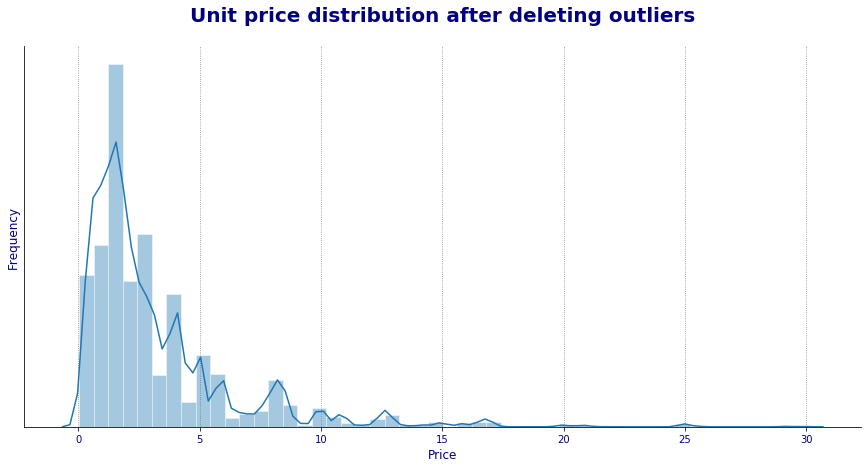

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
fig = sns.distplot(df['UnitPrice'], kde=True)
plt.title('Unit price distribution after deleting outliers', fontsize=20, color='navy', weight='heavy', x=.5, y=1.05)
plt.yticks([])
plt.xlabel('Price', fontsize=12, color='navy')
plt.ylabel('Frequency', fontsize=12, color='navy')
plt.show()

It's not a normal distribution, but looks as a real one.

In [50]:
cols = df.columns.tolist()
cols = cols[:-2] + cols[-1:] + cols[-2:-1]
df.shape

(527159, 8)

Let's repeat the simple statistics:

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,"527,159.00","11,492.63","6,780.22",0.00,"12,357.00","14,396.00","16,278.00","18,287.00"
Quantity,"527,159.00",10.58,155.92,1.00,1.00,3.00,11.00,"80,995.00"
UnitPrice,"527,159.00",3.19,3.25,0.04,1.25,2.08,4.13,30.00


Looks like more bad data was founded.
Outliers first

In [52]:
print(sorted(df['Quantity'].unique())[-100:])

[528, 540, 552, 560, 576, 588, 600, 608, 612, 620, 624, 628, 630, 637, 640, 648, 654, 660, 666, 670, 672, 684, 688, 696, 698, 700, 701, 708, 720, 738, 744, 756, 760, 768, 774, 800, 824, 828, 840, 852, 860, 864, 888, 900, 906, 912, 960, 968, 972, 992, 1000, 1008, 1010, 1020, 1056, 1120, 1130, 1152, 1200, 1284, 1296, 1300, 1350, 1356, 1394, 1400, 1404, 1412, 1428, 1440, 1488, 1500, 1515, 1540, 1600, 1728, 1788, 1820, 1824, 1878, 1900, 1930, 1944, 1992, 2000, 2040, 2100, 2160, 2400, 2592, 2700, 2880, 3000, 3114, 3186, 3906, 4300, 4800, 74215, 80995]


In [53]:
outl = df[df['Quantity']>200]
outl

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description
179,16029,United Kingdom,536387,2010-12,22466,432,1.45,FAIRY TALE COTTAGE NIGHTLIGHT
180,16029,United Kingdom,536387,2010-12,21731,432,1.25,RED TOADSTOOL LED NIGHT LIGHT
217,17511,United Kingdom,536390,2010-12,20668,288,0.10,DISCO BALL CHRISTMAS DECORATION
720,13694,United Kingdom,536437,2010-12,17021,600,0.24,NAMASTE SWAGAT INCENSE
860,16210,United Kingdom,536477,2010-12,21137,480,3.39,BLACK RECORD COVER FRAME
...,...,...,...,...,...,...,...,...
528282,18102,United Kingdom,581457,2011-12,82484,204,4.80,WOOD BLACK BOARD ANT WHITE FINISH
528290,17949,United Kingdom,581458,2011-12,22197,1500,0.72,POPCORN HOLDER
528291,17949,United Kingdom,581459,2011-12,22197,1200,0.72,POPCORN HOLDER
528543,12433,Norway,581476,2011-12,16008,240,0.12,SMALL FOLDING SCISSOR(POINTED EDGE)


In [54]:
df = df.drop(outl.index, axis=0)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,"525,399.00","11,480.63","6,785.81",0.00,"12,347.00","14,395.00","16,270.00","18,287.00"
Quantity,"525,399.00",8.80,16.75,1.00,1.00,3.00,10.00,200.00
UnitPrice,"525,399.00",3.20,3.25,0.04,1.25,2.08,4.13,30.00


### feature engineering:

In [55]:
df['Total'] = df['Quantity']*df['UnitPrice']
df.sample(3)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description,Total
30780,17511,United Kingdom,538991,2010-12,22722,24,3.45,SET OF 6 SPICE TINS PANTRY DESIGN,82.80
218383,16794,United Kingdom,556491,2011-06,23310,36,0.42,BUBBLEGUM RING ASSORTED,15.12
389166,0,United Kingdom,571257,2011-10,23534,1,12.46,WALL ART STOP FOR TEA,12.46


In [56]:
total = df.groupby('InvoiceDate')['Total'].sum().to_frame()
total

,Total
InvoiceDate,
2010-12,"697,075.46"
2011-01,"525,501.51"
2011-02,"463,006.57"
2011-03,"628,054.19"
2011-04,"459,320.94"
2011-05,"683,110.75"
2011-06,"616,356.72"
2011-07,"619,022.35"
2011-08,"629,922.14"


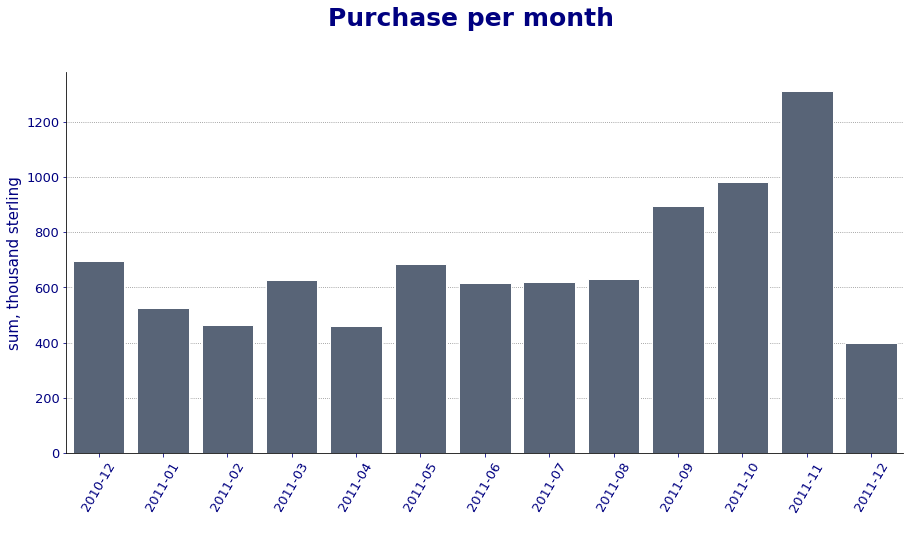

In [57]:
f, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=total.index, y='Total', data=total/1000, dodge=True, color='#53637c')
plt.suptitle('Purchase per month', size=25, x=0.5, y=1.01, weight='heavy', color='navy')

plt.xlabel(' ', color='navy', fontsize=15)
plt.ylabel('sum, thousand sterling', color='navy', fontsize=15)
ax.tick_params(labelsize=13, colors='navy', which='both')
plt.xticks(rotation='60')

plt.show()

It is a lot of analysis we can do with data above, but now we're interesting in cohort analysis only. Let's get started.

# Cohort analysis

## Creating a cohort.
As I've mentioned above, cohort for business is grouping using a first purchase date.
For this data set we can group purchasings monthly.
Than we need to calculate time from first purchase for every purchasing. In this case, monthly also.

In [58]:
df['1stPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
# df['cohort'] = df['1stPurchase'].map({'2010-12': 0, '2011-01':1, '2011-02':2, '2011-03':3, '2011-04':4, '2011-05':5, '2011-06':6, '2011-07':7, '2011-08':8, 
#                                      '2011-09':9, '2011-10':10, '2011-11':11, '2011-12':12 })
df['MonthFrom1st'] = month_diff(pd.to_datetime(df['InvoiceDate']),pd.to_datetime(df['1stPurchase']))
df.sample(10)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Description,Total,1stPurchase,MonthFrom1st
143068,0,United Kingdom,548996,2011-04,22912,2,4.95,YELLOW COAT RACK PARIS FASHION,9.90,2010-12,4
242417,0,United Kingdom,558835,2011-07,82580,1,1.25,BATHROOM METAL SIGN,1.25,2010-12,7
258947,14293,United Kingdom,560222,2011-07,85099B,10,2.08,JUMBO BAG RED RETROSPOT,20.80,2010-12,7
328035,15547,United Kingdom,566295,2011-09,21844,2,2.95,RED RETROSPOT MUG,5.90,2010-12,9
7256,13081,United Kingdom,537034,2010-12,22568,8,3.75,FELTCRAFT CUSHION OWL,30.00,2010-12,0
420688,0,United Kingdom,573585,2011-10,22620,8,2.46,4 TRADITIONAL SPINNING TOPS,19.68,2010-12,10
457958,18259,United Kingdom,576521,2011-11,84029G,24,3.75,KNITTED UNION FLAG HOT WATER BOTTLE,90.00,2010-12,11
219827,0,United Kingdom,556636,2011-06,90093,2,1.63,CLEAR CRYSTAL STAR PHONE CHARM,3.26,2010-12,6
71968,12645,Germany,542369,2011-01,22255,12,0.85,FELT TOADSTOOL SMALL,10.20,2011-01,0
466571,12748,United Kingdom,577057,2011-11,21719,1,0.85,LOVELY BONBON STICKER SHEET,0.85,2010-12,11


In [59]:
groups = df.groupby(['InvoiceDate', '1stPurchase'])
cohorts = groups.agg({'CustomerID': pd.Series.nunique, 'StockCode': pd.Series.nunique, 'Quantity':np.sum, 'Total':np.sum })
cohorts = cohorts.rename(columns={'CustomerID': 'customers', 'StockCode':'products', 'Quantity':'qty', 'Total':'total'})
cohorts

customers  products  qty     total    
InvoiceDate 1stPurchase                                        
2010-12     2010-12      877        2763      305924 697,075.46
2011-01     2010-12      321        2395      171291 343,834.99
            2011-01      409        1797      101999 181,666.52
2011-02     2010-12      282        2112      127604 265,336.52
            2011-01      91         959       24872  49,799.64 
            2011-02      375        1749      82192  147,870.41
2011-03     2010-12      333        2261      168571 356,685.98
            2011-01      112        1101      29537  56,885.61 
            2011-02      69         752       14241  24,954.42 
            2011-03      451        1859      105535 189,528.18
2011-04     2010-12      319        2171      127799 245,863.06
            2011-01      94         953       23022  41,582.80 
            2011-02      69         956       16950  28,561.27 
            2011-03      66         757       14410  26,060.35 
            2011-04      299        1660      69994  117,253.46
2011-05     2010-12      351        2187      170519 367,264.53
            2011-01      131        1109      40177  75,401.99 
            2011-02      104        971       25039  44,745.43 
            2011-03      112        973       28146  53,958.91 
            2011-04      64         724       14835  28,792.67 
            2011-05      280        1525      60919  112,947.22
2011-06     2010-12      319        2338      163555 330,952.20
            2011-01      119        1169      43796  77,667.60 
            2011-02      100        949       24377  38,120.71 
            2011-03      90         997       22708  40,101.16 
            2011-04      61         724       12187  23,543.04 
            2011-05      55         656       10248  18,466.78 
            2011-06      241        1688      53279  87,505.23 
2011-07     2010-12      304        2424      175226 346,402.92
            2011-01      103        1093      35412  64,624.12 
            2011-02      90         914       20609  32,292.09 
            2011-03      101        1052      30463  49,124.57 
            2011-04      62         686       15131  23,677.07 
            2011-05      49         555       10252  18,613.08 
            2011-06      42         627       10648  12,513.68 
            2011-07      189        1640      46534  71,774.82 
2011-08     2010-12      306        2332      172288 336,953.87
            2011-01      100        1130      36439  62,939.73 
            2011-02      95         962       27098  46,639.63 
            2011-03      75         977       23605  37,630.34 
            2011-04      58         731       15720  25,380.73 
            2011-05      50         612       11807  19,466.83 
            2011-06      38         506       7191   12,517.64 
            2011-07      34         421       6705   11,439.21 
            2011-08      171        1645      47644  76,954.16 
2011-09     2010-12      347        2471      218070 440,754.24
            2011-01      123        1308      41589  69,884.90 
            2011-02      100        1082      33483  57,889.15 
            2011-03      119        1145      36455  61,644.86 
            2011-04      68         990       17415  29,341.70 
            2011-05      59         825       16800  27,703.79 
            2011-06      64         864       19185  29,458.17 
            2011-07      39         808       9712   14,795.45 
            2011-08      33         968       8568   18,149.69 
            2011-09      297        1787      89590  145,825.73
2011-10     2010-12      329        2497      213206 448,631.13
            2011-01      135        1453      50716  102,193.66
            2011-02      92         1210      27773  49,134.77 
            2011-03      104        1301      36333  62,194.36 
            2011-04      65         943       17883  28,009.26 
            2011-05      65         1012      19764  31,7

A retention matrix:

In [60]:
c = df.groupby(['1stPurchase', 'MonthFrom1st'])['CustomerID'].apply(pd.Series.nunique).reset_index()
c_sum = c.pivot_table(index='1stPurchase', columns='MonthFrom1st', values='CustomerID')
# printst('The number of active customers, per month from 1st purchase:')

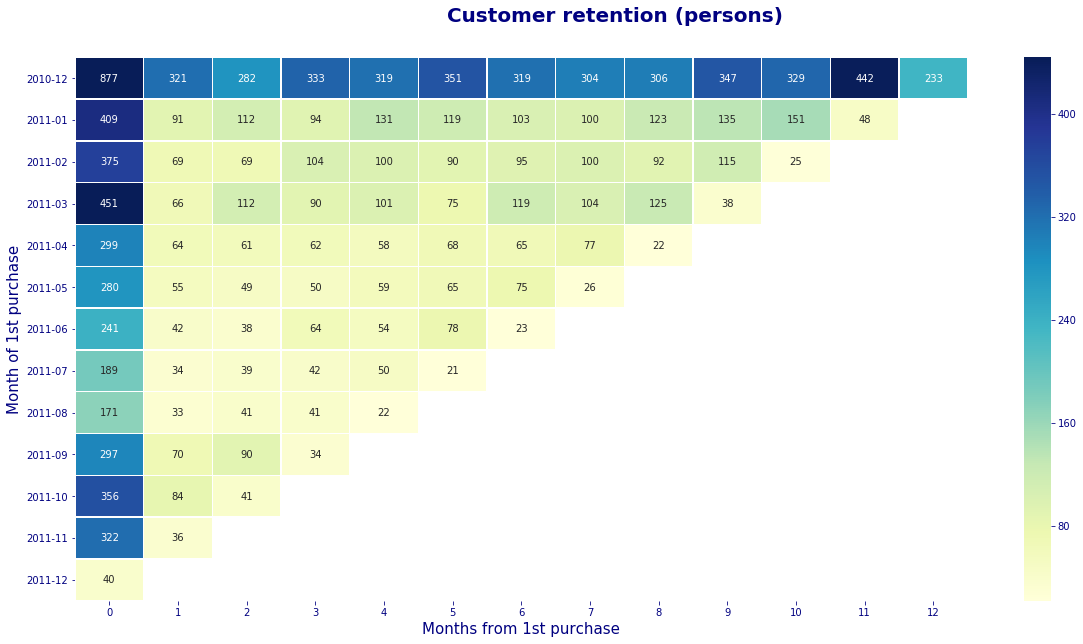

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=c_sum, annot=True, fmt='0g', cmap='YlGnBu', linewidths=.5, robust=True, cbar=True)

fig.suptitle('Customer retention (persons)', fontsize=20, color='navy', weight='heavy', x=.5, y=.95)
ax.set_xlabel('Months from 1st purchase',fontsize=15, color='navy')
ax.set_ylabel('Month of 1st purchase',fontsize=15, color='navy')
plt.yticks(rotation='0')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

plt.show()

### How to Read a Cohort Chart

The cohorts run along the vertical axis, with the oldest cohorts on the top and the newest ones at the bottom. In this example we have monthly cohorts with the oldest being the week of Dec 2010.

Across the horizontal axis are the time periods since the start of the cohort. In this example, they range from month 0 (the month of 1st purchase) through week 12 - one year from the month of first purchase.

The cells in the middle have the corresponding values for the metric you’re plotting - in this case the number of person who made some purchasing at the given month. From the chart we can see that 233 customers who made their first purchase at December 2010 still buy something one year later, despite it were 877 new customers on Dec 2010.

Obviously, the oldest cohorts have the most time in our company, so they have more data. This results in the typical triangle shape of cohort charts, which is why they are sometimes referred to as triangle charts.

To better visualize the trends in the data, cohort charts use color shading (the darker the color, the higher the customer retention). The shading makes it easier to see that our cohorts’ value decays over time and it also makes it easier to see anomalies - like the 11th month from the first purchasing for the first cohort group.

One note of caution - when looking at cohort charts, be mindful of the size of your cohorts. If you only have a handful of users per week, the metrics will likely be highly variable and what could look concerning may be just noise. In that case, consider looking at biweekly or monthly cohorts instead.

And.
I believe than everything is simpler to understand if it's calculated in percentage. Let's do it.

In [62]:
c_new_monthly = c_sum.iloc[:,0] #extract the first column
c_perc = c_sum.divide(c_new_monthly, axis=0)*100
# c_perc

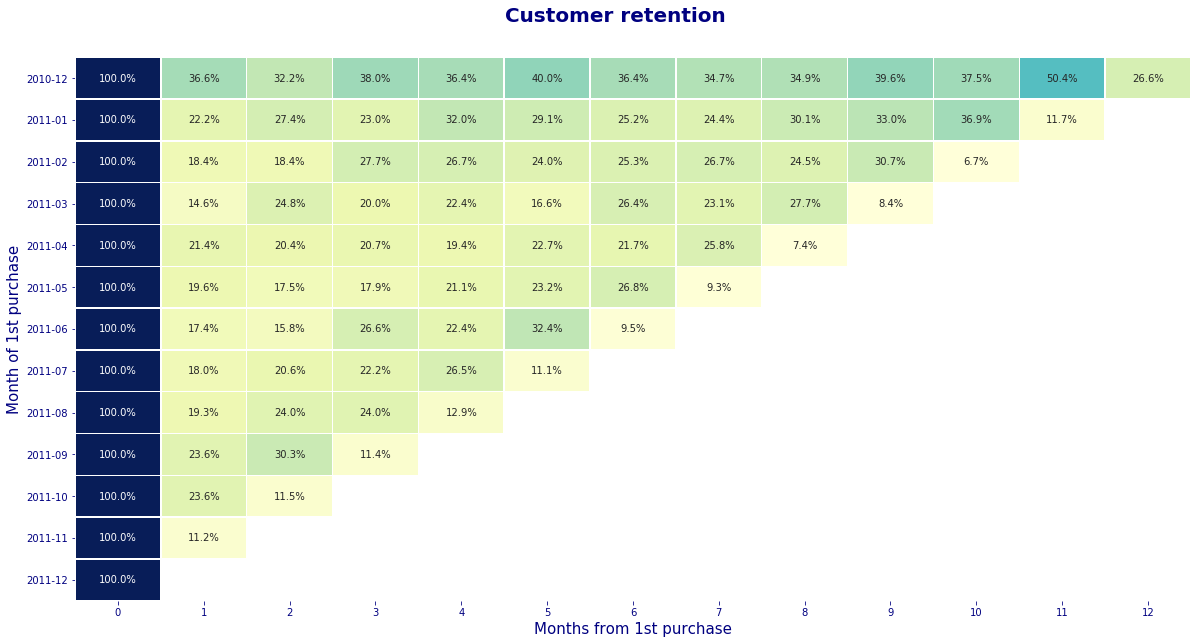

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=c_perc/100, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=.5, robust=True, cbar=False)

fig.suptitle('Customer retention', fontsize=20, color='navy', weight='heavy', x=.5, y=.95)
ax.set_xlabel('Months from 1st purchase',fontsize=15, color='navy')
ax.set_ylabel('Month of 1st purchase',fontsize=15, color='navy')
plt.yticks(rotation='0')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

Notice that the first period of each cohort is always 100% -- this is because our cohorts are based on each user's first purchase. 

We can see that fewer users purchase as time goes on. 

We can also see that the 2010-12 cohort is the strongest, which enables us to ask targeted questions about this cohort compared to others -
- What other attributes (besides first purchase month) have these users? 
- Was there a specific marketing campaign that brought them in? 

The answers to these questions may be important.

Let's do the same by for the purchase amounts.

In [64]:
total = df.groupby(['1stPurchase', 'MonthFrom1st'])['Total'].sum().reset_index()
# total.head()

In [65]:
total_sum = total.pivot_table(index='1stPurchase', columns='MonthFrom1st', values='Total')
# printst('Total amount per month from 1st purchase:')
# total_sum.T

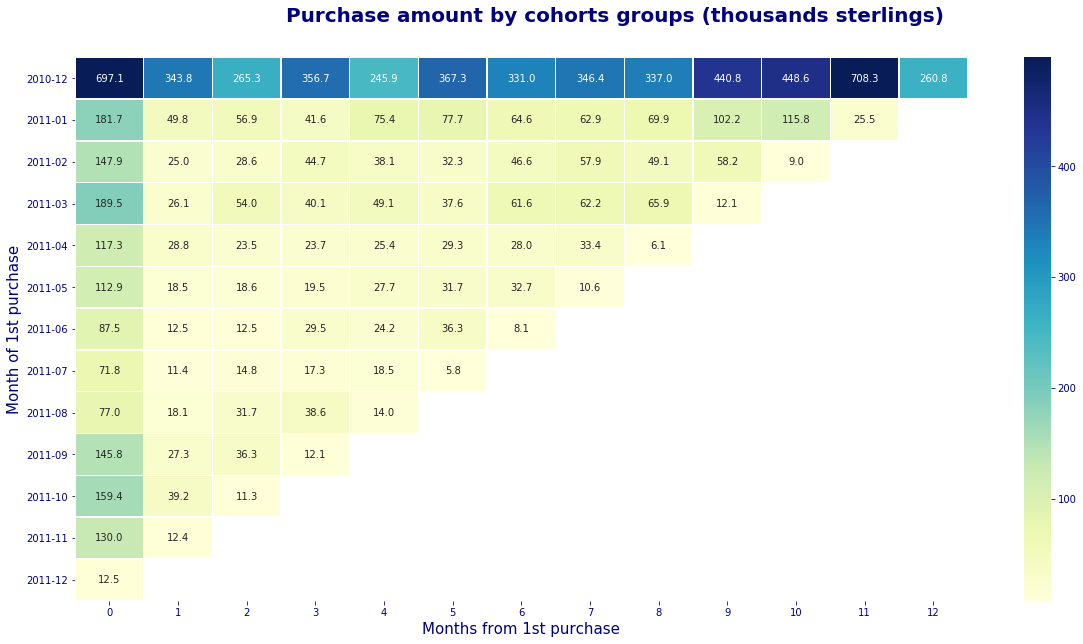

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=total_sum/1000, annot=True, fmt='0.1f', cmap='YlGnBu', linewidths=.5, robust=True, cbar=True)

fig.suptitle('Purchase amount by cohorts groups (thousands sterlings)', fontsize=20, color='navy', weight='heavy', x=.5, y=.95)
ax.set_xlabel('Months from 1st purchase',fontsize=15, color='navy')
ax.set_ylabel('Month of 1st purchase',fontsize=15, color='navy')
plt.yticks(rotation='0')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

I have no information about any events that could impact sales and customer retention rates, as well as dataset is limited, so I should stop now instead of start deep analysis.

# 4. Conclusion

While cohort analyses are complex and they require a lot of time to look through multiple metrics, the result of this exercise will be incredibly useful for understanding your customers, your seasonality, and your business changes.

But we should remember: “The right question gives the right answer”. What do you want to know? How can analysis results be used to improve the business? What indicators will help answer the question?

The purpose of the analysis is to obtain effective information that you can use to improve the final result (profit).
We can segment customers by the products they prefer, date of purchase, reaction to marketing actions, frequency of purchases, etc.
Choosing the right cohort gives the best result.
